In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
def createDataframe():
    data_csv = [pd.read_csv(f'/Users/devswaika/Desktop/VIT/Fourth Year/Fall Sem/E1 Metrics/J Comp/archive/dataset-of-{decade}0s.csv') for decade in ['6', '7', '8', '9', '0', '1']]
    return data_csv

In [3]:
dfs = createDataframe()

In [4]:
def createData(dfs):
    for i, decade in enumerate([1960, 1970, 1980, 1990, 2000, 2010]):
        dfs[i]['decade'] = pd.Series(decade, index=dfs[i].index)
    data = pd.concat(dfs, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)
    return data

In [5]:
data = createData(dfs)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41106 entries, 0 to 41105
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             41106 non-null  object 
 1   artist            41106 non-null  object 
 2   uri               41106 non-null  object 
 3   danceability      41106 non-null  float64
 4   energy            41106 non-null  float64
 5   key               41106 non-null  int64  
 6   loudness          41106 non-null  float64
 7   mode              41106 non-null  int64  
 8   speechiness       41106 non-null  float64
 9   acousticness      41106 non-null  float64
 10  instrumentalness  41106 non-null  float64
 11  liveness          41106 non-null  float64
 12  valence           41106 non-null  float64
 13  tempo             41106 non-null  float64
 14  duration_ms       41106 non-null  int64  
 15  time_signature    41106 non-null  int64  
 16  chorus_hit        41106 non-null  float6

In [7]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Drop high-cardinality categorical columns
    df = df.drop(['track', 'artist', 'uri'], axis=1)
    
    # Split df into X and y
    y = df['target']
    X = df.drop('target', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    X_train_copy, X_test_copy, y_train_copy, y_test_copy = train_test_split(X, y, train_size=0.7, shuffle=False, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    scaler.fit(X_train_copy)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    X_train_copy = pd.DataFrame(scaler.transform(X_train_copy), index=X_train_copy.index, columns=X_train_copy.columns)
    X_test_copy = pd.DataFrame(scaler.transform(X_test_copy), index=X_test_copy.index, columns=X_test_copy.columns)
    
    
    return X_train, X_test, y_train, y_test, X_train_copy, X_test_copy, y_train_copy, y_test_copy

In [8]:
X_train, X_test, y_train, y_test, X_train_copy, X_test_copy, y_train_copy, y_test_copy = preprocess_inputs(data)

In [28]:
X_train

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,decade
17085,-0.803579,-1.153508,-0.911595,-1.108031,0.664463,-0.470079,1.597443,2.365261,-0.730825,-0.562646,0.598499,0.857555,0.251398,-0.114322,1.111575,-0.728001
5559,-1.851803,1.465022,0.219982,1.133744,-1.504975,0.278543,-0.871949,-0.411880,0.339355,-0.551441,0.307504,-0.393836,0.251398,2.358624,-1.104280,-0.156570
32888,-0.217476,0.959484,-1.477384,0.836655,0.664463,-0.399607,0.226872,-0.508212,1.284137,0.998542,1.222448,0.247178,0.251398,-0.827179,0.507251,-0.156570
14170,-1.158623,1.465022,-0.345807,0.735873,-1.504975,-0.150066,-1.075755,0.356139,0.465326,-0.129398,-0.770017,0.644171,0.251398,1.294883,0.910134,0.986290
7958,0.656043,-1.264095,-1.477384,0.217328,0.664463,-0.520912,0.560653,-0.508212,-0.324855,-1.018303,-1.250977,-0.654473,0.251398,-0.552763,-0.701398,-0.728001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7813,1.067443,1.615104,1.068665,1.050416,-1.504975,-0.279458,-1.045633,-0.508066,1.375752,1.106854,0.242074,0.958913,0.251398,-1.140895,1.111575,-0.156570
32511,-1.243157,0.584280,-0.911595,-0.132122,-1.504975,1.049116,-0.216201,-0.508195,-0.141625,-0.387105,1.935709,1.839028,0.251398,1.013845,0.910134,-0.728001
5192,-0.820486,-1.169306,1.634453,-1.385039,-1.504975,-0.449284,-0.242785,-0.508208,0.058783,-0.088314,-0.840429,-0.650781,0.251398,-0.313939,-0.499956,0.414860
12172,0.193923,1.346536,-1.477384,0.837593,-1.504975,-0.042625,-1.071125,1.058837,2.669817,-1.070592,0.088295,0.667744,0.251398,-0.347180,-0.902839,0.986290


In [10]:
#y_train

In [11]:
models = {
        "Logistic Regression": LogisticRegression(),
        "K-Nearest Neighbors": KNeighborsClassifier(),
        "Decision Tree": DecisionTreeClassifier(),
        "Support Vector Machine (Linear Kernel)": LinearSVC(),
        "Support Vector Machine (RBF Kernel)": SVC(),
        "Neural Network": MLPClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Gradient Boosting": GradientBoostingClassifier()
    }

def train_models(models, X_train, y_train):
    for name, model in models.items():
        model.fit(X_train, y_train)
        print(name + " trained.")

In [12]:
train_models(models, X_train, y_train)

Logistic Regression trained.
K-Nearest Neighbors trained.
Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
Support Vector Machine (RBF Kernel) trained.
Neural Network trained.
Random Forest trained.
Gradient Boosting trained.


In [13]:
def models_accuracy(models, X_test, y_test):
    for name, model in models.items():
        print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))
models_accuracy(models, X_test, y_test)

Logistic Regression: 74.50%
K-Nearest Neighbors: 75.30%
Decision Tree: 72.49%
Support Vector Machine (Linear Kernel): 74.25%
Support Vector Machine (RBF Kernel): 80.26%
Neural Network: 79.90%
Random Forest: 80.90%
Gradient Boosting: 79.64%


In [14]:
for name,model in models.items():
    if (name=='Random Forest'):
        final_model = model

prediction = final_model.predict(X_test)
print("Preditction: ",prediction[:15])
print("Acutal:      ",np.array(y_test)[:15])

Preditction:  [1 0 1 0 1 0 0 1 1 0 1 0 0 0 0]
Acutal:       [1 1 1 0 0 1 1 1 0 0 0 0 0 0 0]


In [15]:
x_test_copy_list = X_test_copy.values.tolist()
x_train_copy_list = X_train_copy.values.tolist()
#format(x_test_copy_list[:2])

In [16]:
data_list = data.values.tolist()
#data_list

In [17]:
Validation_list = x_train_copy_list + x_test_copy_list
#Validation_list

In [18]:
def PredictHit(song, data_list, final_model, Validation_list):
    for music in data_list:
        if (music[0] == song):
            music_index = data_list.index(music)
            break
    prediction_made = final_model.predict([Validation_list[music_index]])

    if (prediction_made == 0):
        print("Model predicts '" + data_list[music_index][0] + "' is a Flop")
    else:
        print("Model predicts '" + data_list[music_index][0] + "' is a Hit")

    if (data_list[music_index][18] == 0):
        print("Data says '" + data_list[music_index][0] + "' is a Flop")
    else:
        print("Data says '" + data_list[music_index][0] + "' is a Hit")

In [19]:
song = input("Enter a song name : ")
PredictHit(song, data_list, final_model, Validation_list)

Enter a song name : So Fly
Model predicts 'So Fly' is a Hit
Data says 'So Fly' is a Hit


In [20]:
def ConfusionMatrix(y_test, prediction, final_model, X_test):
    from sklearn.metrics import confusion_matrix, plot_confusion_matrix
    confusion_matrix(y_test,prediction, labels=(1,0))
    tp, fn, fp, tn = confusion_matrix(y_test,prediction, labels=(1,0)).ravel()
    plot_confusion_matrix(final_model,X_test,y_test, labels=(1,0))
    print(tp, fn, fp, tn)

5273 889 1467 4703


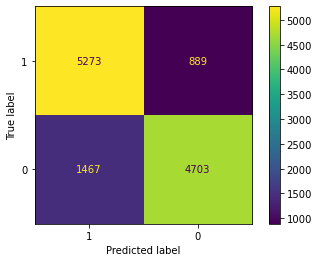

In [21]:
ConfusionMatrix(y_test, prediction, final_model, X_test)

In [22]:
def ROC_Curve(y_test, prediction):
    import matplotlib.pyplot as plt
    from sklearn.metrics import roc_curve
    fpr, tpr, thresholds = roc_curve(y_test, prediction.ravel())
    plt.figure(1)
    plt.plot([0,1], [0,1], 'y--')
    plt.plot(fpr, tpr, marker='.')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

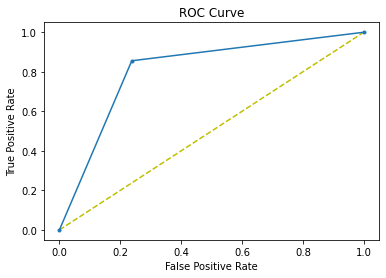

In [23]:
ROC_Curve(y_test, prediction)

In [24]:
def ModelMetrics(y_test, prediction):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error
    print("Accuracy:  ",accuracy_score(y_test, prediction)*100)
    print("Precision: ",precision_score(y_test, prediction)*100)
    print("Recall:    ",recall_score(y_test, prediction)*100)
    print("F1-Score:  ",f1_score(y_test, prediction)*100)
    print("MSE:       ",mean_squared_error(y_test, prediction)*100)
    print("RMSE:      ",mean_squared_error(y_test, prediction, squared = False)*100)
    print("MAE:       ",mean_absolute_error(y_test, prediction)*100)

In [25]:
ModelMetrics(y_test, prediction)

Accuracy:   80.895231916964
Precision:  78.23442136498517
Recall:     85.57286595261279
F1-Score:   81.73926523019686
MSE:        19.104768083036003
RMSE:       43.70900145626299
MAE:        19.104768083036003


In [25]:
data.columns

Index(['track', 'artist', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target', 'decade'],
      dtype='object')

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

{'whiskers': [<matplotlib.lines.Line2D at 0x7f952e965a30>,
 'caps': [<matplotlib.lines.Line2D at 0x7f952e996be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f952e965760>],
 'medians': [<matplotlib.lines.Line2D at 0x7f952e9a11c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f952e9a1490>],
 'means': []}

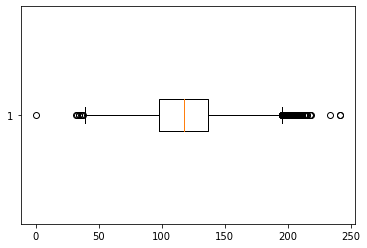

In [28]:
plt.boxplot(data['tempo'], meanline=True, vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f952eaa07c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f952eab64f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f952eaa0220>],
 'medians': [<matplotlib.lines.Line2D at 0x7f952eab6910>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f952eaa4070>],
 'means': []}

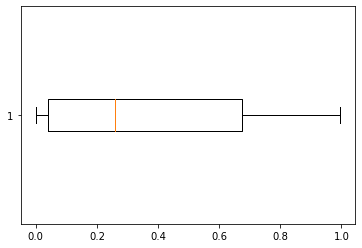

In [30]:
plt.boxplot(data['acousticness'], meanline=True, vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f952ecb7190>,
 'caps': [<matplotlib.lines.Line2D at 0x7f952ecb7730>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f952ecabe80>],
 'medians': [<matplotlib.lines.Line2D at 0x7f952ecb7d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f952ecb7fd0>],
 'means': []}

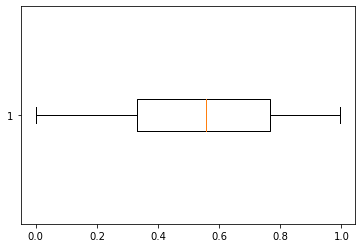

In [32]:
plt.boxplot(data['valence'], meanline=True, vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f952f2cf6d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f952f2cfc70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f952f2cf400>],
 'medians': [<matplotlib.lines.Line2D at 0x7f952f2c6250>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f952f2c6520>],
 'means': []}

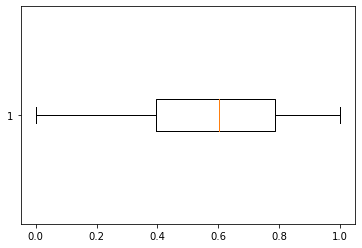

In [35]:
plt.boxplot(data['energy'], meanline=True, vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f95090433a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9509043940>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f95090430d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9509043ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f952f1581f0>],
 'means': []}

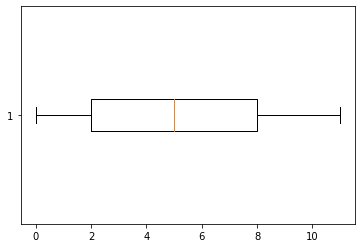

In [36]:
plt.boxplot(data['key'], meanline=True, vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f950904f190>,
 'caps': [<matplotlib.lines.Line2D at 0x7f950904f730>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f952f18de80>],
 'medians': [<matplotlib.lines.Line2D at 0x7f950904fcd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f950904ffa0>],
 'means': []}

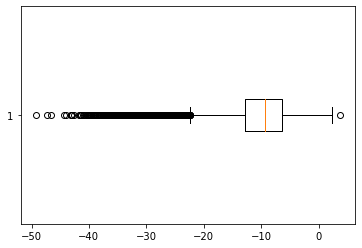

In [38]:
plt.boxplot(data['loudness'], meanline=True, vert=False)